In [42]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [46]:
# Define paths
data_dir = '/home/vmuser/2024/ACML/ASL'
# train_dir = 'ASL_train'
# test_dir = 'ASL_test'

split_ratio = 0.8  # 80% training, 20% testing

datagen = ImageDataGenerator(validation_split=1 - split_ratio)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),  # Resize images to a specific size (if needed)
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 725 images belonging to 29 classes.
Found 145 images belonging to 29 classes.


Displaying 2 images from class 'A':


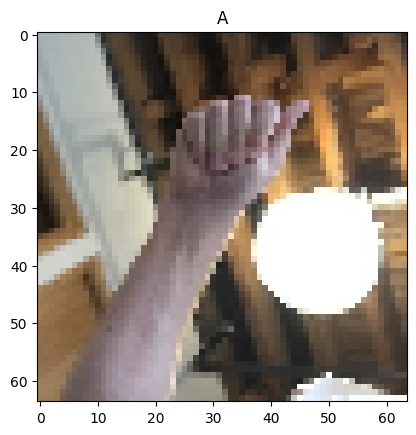

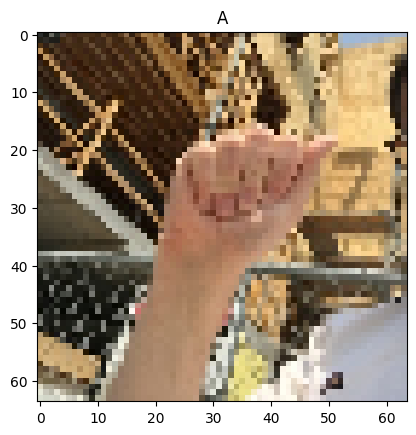

Displaying 2 images from class 'A':


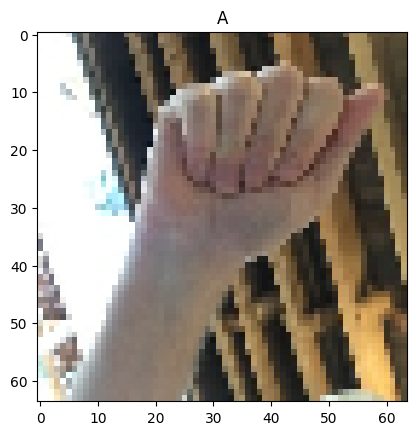

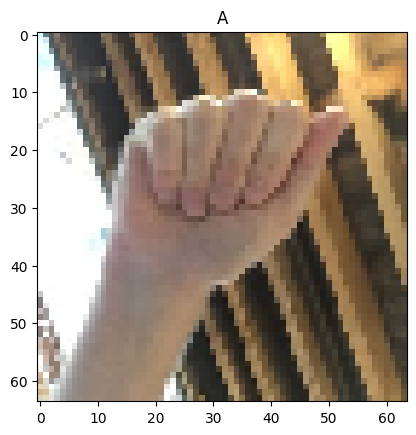

In [55]:
def display_images(generator, class_name, num_images=2):
    class_index = generator.class_indices[class_name]
    class_dir = os.path.join(data_dir, class_name)
    
    images = os.listdir(class_dir)
    
    print(f"Displaying {num_images} images from class '{class_name}':")
    count = 0
    for batch, labels in generator:
        for img, label in zip(batch, labels):
            if label[class_index] == 1:
                plt.imshow(img.astype('uint8'))
                plt.title(f'{class_name}')
                plt.show()
                count += 1
                if count >= num_images:
                    return

display_images(train_generator, 'A')
display_images(test_generator, 'A')

In [56]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(29, activation='softmax')
])


/home/vmuser/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 29)             │        14,877 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,467,933 (9.41 MB)

 Trainable params: 2,467,933 (9.41 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.0349 - loss: 50.3438 - val_accuracy: 0.0414 - val_loss: 3.3736
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.0941 - loss: 3.2251 - val_accuracy: 0.0897 - val_loss: 3.1686
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.2882 - loss: 2.5898 - val_accuracy: 0.1379 - val_loss: 2.9148
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.3937 - loss: 2.1196 - val_accuracy: 0.2069 - val_loss: 2.8640
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.4833 - loss: 1.7716 - val_accuracy: 0.2966 - val_loss: 2.6529
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.5779 - loss: 1.4013 - val_accuracy: 0.3517 - val_loss: 2.6530
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 0.6649 - loss: 1.1717 - val_accuracy: 0.3517 - val_loss: 2.7956
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.7947 - loss: 0.7634 - val_accuracy: 0.4

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3424 - loss: 3.4310
Validation Loss: 3.352050542831421
Validation Accuracy: 0.3448275923728943


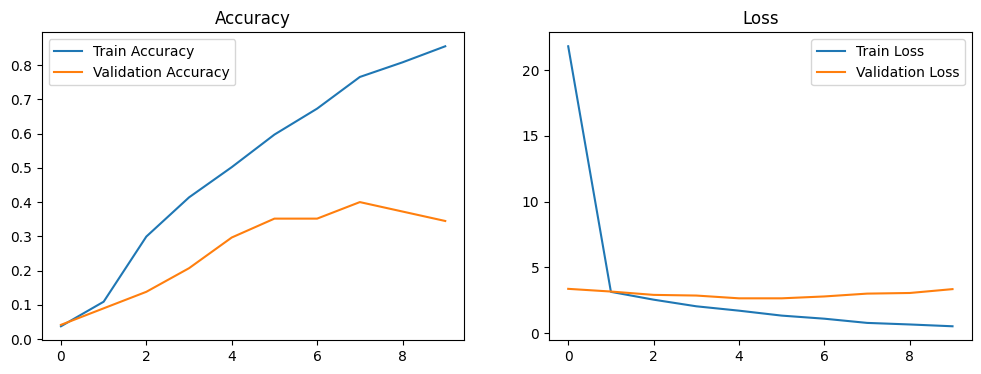

In [59]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(test_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Plotting the accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


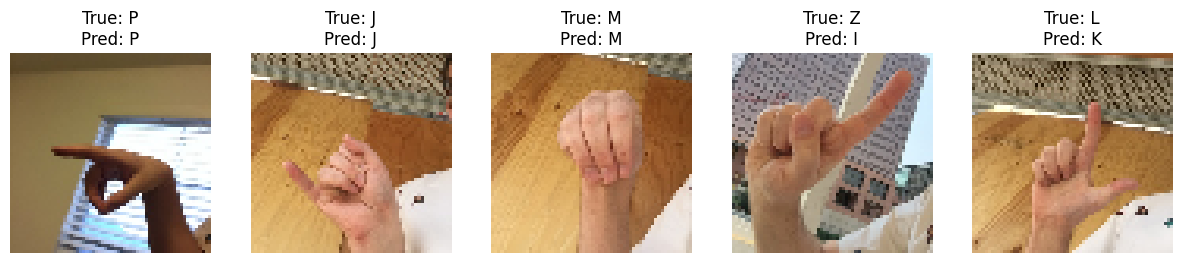

In [60]:
validation_images, validation_labels = next(test_generator)

# Make predictions on the validation images
predictions = model.predict(validation_images)

# Get the class indices
class_indices = {v: k for k, v in test_generator.class_indices.items()}

# Display a few validation images with their predicted labels
num_images_to_display = 5
plt.figure(figsize=(15, 10))

for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(validation_images[i].astype('uint8'))
    true_label = class_indices[np.argmax(validation_labels[i])]
    predicted_label = class_indices[np.argmax(predictions[i])]
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')

plt.show()